In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from zipfile import ZipFile
from pathlib import Path

import torch
import torch.nn as nn
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import sklearn.ensemble

from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [3]:
zip_path = Path("/content/drive/MyDrive/Colab Notebooks/datasets/Pumpkin.zip")
dataset_folder_path = Path("/content/drive/MyDrive/Colab Notebooks/datasets/Pumpkin")

if not dataset_folder_path.is_dir():
  with ZipFile(zip_path,"r") as f:
    f.extractall(dataset_folder_path)
else:
  print("Pumpkin dataset already extracted")

Pumpkin dataset already extracted


In [4]:
df = pd.read_excel(dataset_folder_path/"Pumpkin_Seeds_Dataset"/"Pumpkin_Seeds_Dataset.xlsx")
df.head(5)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [6]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [7]:
feature_columns = df.columns[:-1].to_list()

array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'Major_Axis_Length'}>],
       [<Axes: title={'center': 'Minor_Axis_Length'}>,
        <Axes: title={'center': 'Convex_Area'}>,
        <Axes: title={'center': 'Equiv_Diameter'}>],
       [<Axes: title={'center': 'Eccentricity'}>,
        <Axes: title={'center': 'Solidity'}>,
        <Axes: title={'center': 'Extent'}>],
       [<Axes: title={'center': 'Roundness'}>,
        <Axes: title={'center': 'Aspect_Ration'}>,
        <Axes: title={'center': 'Compactness'}>]], dtype=object)

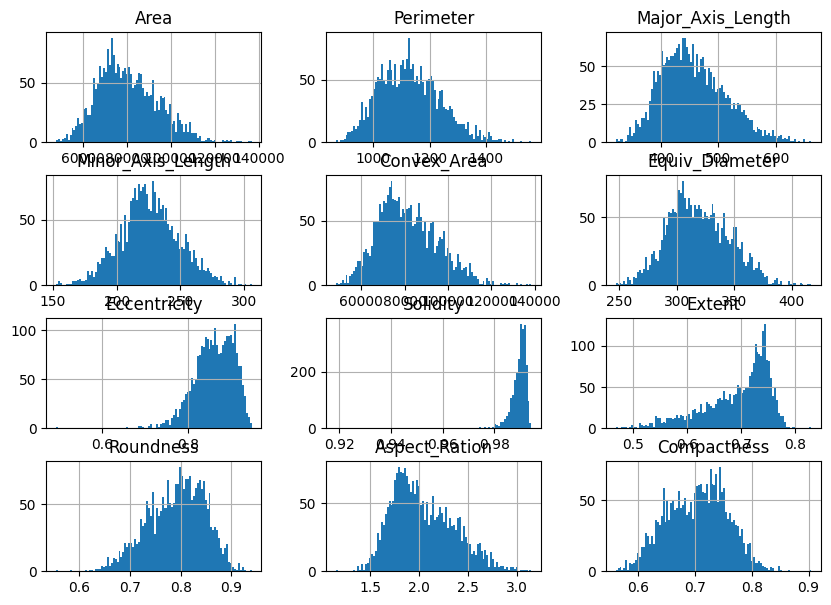

In [8]:
df.hist(bins=100,figsize=(10,7))

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
Area,1.000000,0.928548,0.789133,0.685304,0.999806,0.998464,0.159624,0.158388,-0.014018,-0.149378,0.159960,-0.160438
Perimeter,0.928548,1.000000,0.946181,0.392913,0.929971,0.928055,0.464601,0.065340,-0.140600,-0.500968,0.487880,-0.484440
Major_Axis_Length,0.789133,0.946181,1.000000,0.099376,0.789061,0.787078,0.704287,0.119291,-0.214990,-0.684972,0.729156,-0.726958
Minor_Axis_Length,0.685304,0.392913,0.099376,1.000000,0.685634,0.690020,-0.590877,0.090915,0.233576,0.558566,-0.598475,0.603441
Convex_Area,0.999806,0.929971,0.789061,0.685634,1.000000,0.998289,0.159156,0.139178,-0.015449,-0.153615,0.159822,-0.160432
Equiv_Diameter,0.998464,0.928055,0.787078,0.690020,0.998289,1.000000,0.156246,0.159454,-0.010970,-0.145313,0.155762,-0.156411
Eccentricity,0.159624,0.464601,0.704287,-0.590877,0.159156,0.156246,1.000000,0.043991,-0.327316,-0.890651,0.950225,-0.981689
Solidity,0.158388,0.065340,0.119291,0.090915,0.139178,0.159454,0.043991,1.000000,0.067537,0.200836,0.026410,-0.019967
Extent,-0.014018,-0.140600,-0.214990,0.233576,-0.015449,-0.010970,-0.327316,0.067537,1.000000,0.352338,-0.329933,0.336984
Roundness,-0.149378,-0.500968,-0.684972,0.558566,-0.153615,-0.145313,-0.890651,0.200836,0.352338,1.000000,-0.935233,0.933308


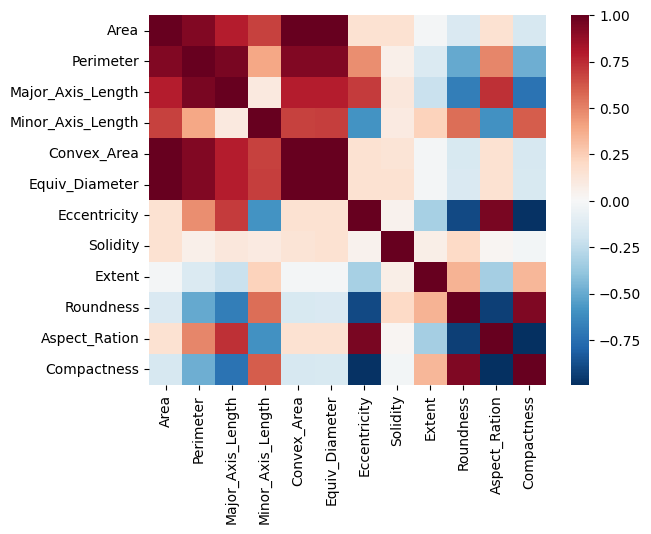

In [9]:
# print the correation heat map to check the correaltion between vaious columns
sns.heatmap(df[feature_columns].corr(),cmap='RdBu_r')
df[feature_columns].corr()

In [10]:
# Dropping columns which are heavily corelated linearly
df_mod = df.drop(["Area","Perimeter","Convex_Area","Equiv_Diameter"],axis=1)

,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
Major_Axis_Length,1.000000,0.099376,0.704287,0.119291,-0.214990,-0.684972,0.729156,-0.726958
Minor_Axis_Length,0.099376,1.000000,-0.590877,0.090915,0.233576,0.558566,-0.598475,0.603441
Eccentricity,0.704287,-0.590877,1.000000,0.043991,-0.327316,-0.890651,0.950225,-0.981689
Solidity,0.119291,0.090915,0.043991,1.000000,0.067537,0.200836,0.026410,-0.019967
Extent,-0.214990,0.233576,-0.327316,0.067537,1.000000,0.352338,-0.329933,0.336984
Roundness,-0.684972,0.558566,-0.890651,0.200836,0.352338,1.000000,-0.935233,0.933308
Aspect_Ration,0.729156,-0.598475,0.950225,0.026410,-0.329933,-0.935233,1.000000,-0.990778
Compactness,-0.726958,0.603441,-0.981689,-0.019967,0.336984,0.933308,-0.990778,1.000000


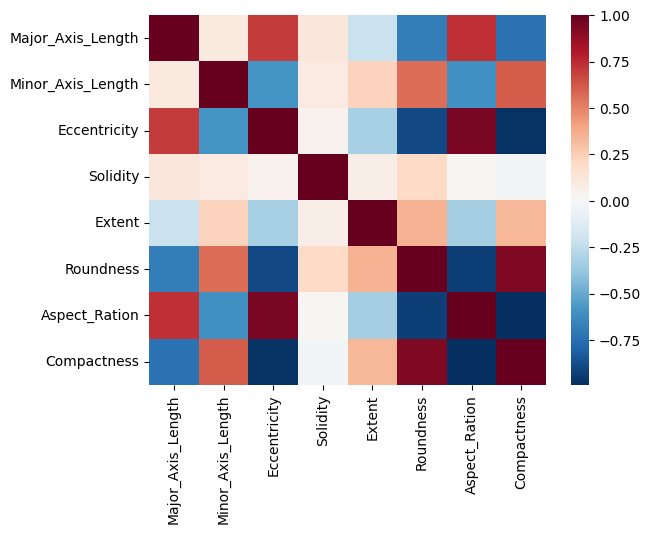

In [11]:
sns.heatmap(df_mod[df_mod.columns[:-1].to_list()].corr(),cmap='RdBu_r')
df_mod[df_mod.columns[:-1].to_list()].corr()

In [12]:
#sns.pairplot(df_mod[df_mod.columns.to_list()],hue="Class")

,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration
Major_Axis_Length,1.000000,0.099376,0.704287,0.119291,-0.214990,-0.684972,0.729156
Minor_Axis_Length,0.099376,1.000000,-0.590877,0.090915,0.233576,0.558566,-0.598475
Eccentricity,0.704287,-0.590877,1.000000,0.043991,-0.327316,-0.890651,0.950225
Solidity,0.119291,0.090915,0.043991,1.000000,0.067537,0.200836,0.026410
Extent,-0.214990,0.233576,-0.327316,0.067537,1.000000,0.352338,-0.329933
Roundness,-0.684972,0.558566,-0.890651,0.200836,0.352338,1.000000,-0.935233
Aspect_Ration,0.729156,-0.598475,0.950225,0.026410,-0.329933,-0.935233,1.000000


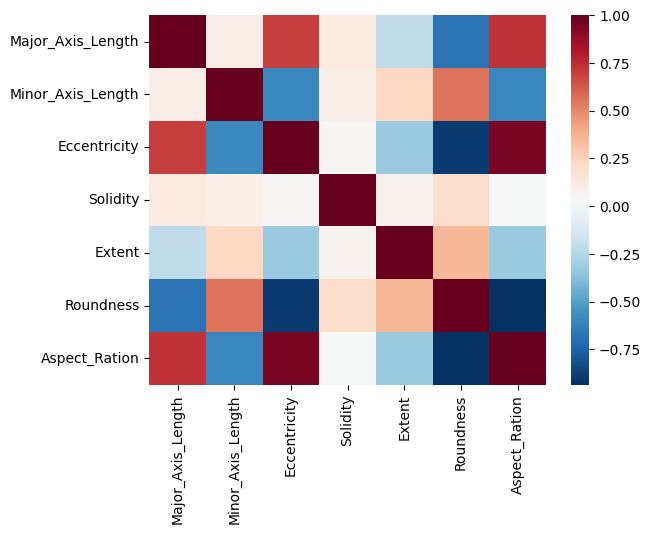

In [13]:
# Dropping inversely correalted column
df_mod = df_mod.drop(["Compactness"],axis=1)
sns.heatmap(df_mod[df_mod.columns[:-1].to_list()].corr(),cmap='RdBu_r')
df_mod[df_mod.columns[:-1].to_list()].corr()

,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Solidity,Extent,Roundness
Major_Axis_Length,1.000000,0.099376,0.704287,0.119291,-0.214990,-0.684972
Minor_Axis_Length,0.099376,1.000000,-0.590877,0.090915,0.233576,0.558566
Eccentricity,0.704287,-0.590877,1.000000,0.043991,-0.327316,-0.890651
Solidity,0.119291,0.090915,0.043991,1.000000,0.067537,0.200836
Extent,-0.214990,0.233576,-0.327316,0.067537,1.000000,0.352338
Roundness,-0.684972,0.558566,-0.890651,0.200836,0.352338,1.000000


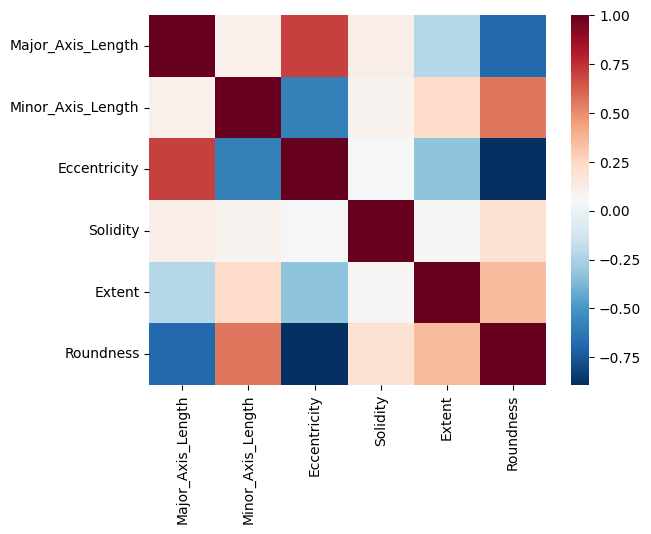

In [14]:
# Dropping inversely correalted column
df_mod = df_mod.drop(["Aspect_Ration"],axis=1)
sns.heatmap(df_mod[df_mod.columns[:-1].to_list()].corr(),cmap='RdBu_r')
df_mod[df_mod.columns[:-1].to_list()].corr()

In [15]:
scaler = StandardScaler()
df_mod_scaled = df_mod.copy()
df_mod_scaled[df_mod_scaled.columns[:-1].to_list()] = scaler.fit_transform(df_mod[df_mod.columns[:-1].to_list()])

In [16]:
df_mod_scaled.head(5)

,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Solidity,Extent,Roundness,Class
0,-2.320224,-0.238536,-2.729935,0.202812,0.855406,1.873763,Çerçevelik
1,-0.700916,0.362089,-0.739163,0.603626,0.359523,0.938377,Çerçevelik
2,-0.369395,-0.633215,0.310476,-1.085518,0.768380,-0.431615,Çerçevelik
3,-1.334616,-0.140076,-1.075756,0.202812,0.761812,1.020648,Çerçevelik
4,-1.293272,-0.229276,-0.934033,-1.285925,-0.295634,0.755950,Çerçevelik


In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(df_mod_scaled[df_mod_scaled.columns[:-1].to_list()],df_mod_scaled[df_mod_scaled.columns[-1]],random_state=42)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1875, 6), (625, 6), (1875,), (625,))

**K Nearest Neighbours Model**


In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
knn_pred = knn.predict(X_test)

**Support Vector Machine Model**

In [20]:
param_grid = {"C":[0.1,1,100,1000],"gamma":[1,0.1,0.01,0.001,0.0001],"kernel":["rbf"]}
grid = GridSearchCV(SVC(),param_grid)
grid.fit(X_train,Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [21]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [22]:
svc_pred = grid.predict(X_test)

**Decision Trees**

In [23]:
dtree = DecisionTreeClassifier()

In [24]:
dtree.fit(X_train,Y_train)


DecisionTreeClassifier()

In [25]:
dtree_pred = dtree.predict(X_test)

**Random Forest Classiffier**

In [26]:
forest = sklearn.ensemble.RandomForestClassifier()
forest.fit(X_train,Y_train)

RandomForestClassifier()

In [27]:
forest_pred = forest.predict(X_test)

**Compare Outputs**

In [28]:
def compare_classification_models(y_true, *y_preds):
    """
    Prints the classification report for multiple classification models.

    Parameters:
    y_true (list or numpy array): The true labels.
    *y_preds (list or numpy array): The predicted labels from each model.
    target_names (list, optional): The names of the target classes.
    """
    print("Classification Report:")

    for i, y_pred in enumerate(y_preds):
        print(f"Model {i+1}:")
        print(classification_report(y_true, y_pred))
        print(confusion_matrix(y_true, y_pred))
        print()

In [29]:
compare_classification_models(Y_test,
                              knn_pred,
                              svc_pred,
                              dtree_pred,
                              forest_pred)

Classification Report:
Model 1:
               precision    recall  f1-score   support

   Çerçevelik       0.82      0.88      0.85       316
Ürgüp Sivrisi       0.87      0.81      0.84       309

     accuracy                           0.84       625
    macro avg       0.85      0.84      0.84       625
 weighted avg       0.84      0.84      0.84       625

[[278  38]
 [ 60 249]]

Model 2:
               precision    recall  f1-score   support

   Çerçevelik       0.84      0.92      0.88       316
Ürgüp Sivrisi       0.91      0.83      0.86       309

     accuracy                           0.87       625
    macro avg       0.88      0.87      0.87       625
 weighted avg       0.87      0.87      0.87       625

[[290  26]
 [ 54 255]]

Model 3:
               precision    recall  f1-score   support

   Çerçevelik       0.83      0.80      0.81       316
Ürgüp Sivrisi       0.80      0.83      0.82       309

     accuracy                           0.82       625
    macro avg 

**Neural Network**

In [50]:
X_train_tensor = torch.tensor(X_train.values,dtype=torch.float)
Y_train_tensor = torch.tensor(Y_train.replace({"Çerçevelik":0,"Ürgüp Sivrisi":1}).values,dtype=torch.float)
X_test_tensor = torch.tensor(X_test.values,dtype=torch.float)
Y_test_tensor = torch.tensor(Y_test.replace({"Çerçevelik":0,"Ürgüp Sivrisi":1}).values,dtype=torch.float)

In [51]:
class PumpkinSeedClassifier(nn.Module):
  def __init__(self,input=6,n_layers=2,n_units=16,output=1):
    super().__init__()
    self.activation = nn.ReLU()
    layers = [
            nn.Linear(input, n_units),
            self.activation
      ]

    for i in range(n_layers):
      layers.append(nn.Linear(n_units,n_units))
      layers.append(self.activation)

    layers.append(nn.Linear(n_units,output))

    self.model = nn.Sequential(*layers)

  def forward(self,X):
    X = self.model(X)
    return X


In [101]:
model = PumpkinSeedClassifier(6,1,8,1)
print(model)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=0.02)

PumpkinSeedClassifier(
  (activation): ReLU()
  (model): Sequential(
    (0): Linear(in_features=6, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=1, bias=True)
  )
)


In [102]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [103]:
torch.round(torch.sigmoid(model(X_train_tensor[0])))

tensor([1.], grad_fn=<RoundBackward0>)

In [104]:
epochs = 801
train_loss,train_acc,test_loss,test_acc =[],[],[],[]

for epoch in range(epochs):
  model.train()
  logits_train = model(X_train_tensor)
  loss_train = loss_fn(logits_train.squeeze(),Y_train_tensor)
  #train_loss.append(loss_train.item())
  pred_train = torch.round(torch.sigmoid(logits_train.squeeze()))
  acc_train = accuracy_fn(Y_train_tensor,pred_train)
  #train_acc.append(acc_train)

  optimizer.zero_grad()
  loss_train.backward()
  optimizer.step()

  if epoch%50 == 0:
    with torch.inference_mode():
      model.eval()
      logits_test = model(X_test_tensor)
      loss_test = loss_fn(logits_test.squeeze(),Y_test_tensor)
      train_loss.append(loss_train.item())
      test_loss.append(loss_test.item())
      pred_test = torch.round(torch.sigmoid(logits_test.squeeze()))
      acc_test = accuracy_fn(Y_test_tensor,pred_test)
      test_acc.append(acc_test)
      train_acc.append(acc_train)

      print(f"Train loss: {loss_train} | Train accuracy: {acc_train} Test loss: {loss_test} | Test accuracy: {acc_test}")



Train loss: 0.685548722743988 | Train accuracy: 57.97333333333333 Test loss: 0.6719112992286682 | Test accuracy: 65.92
Train loss: 0.2756884694099426 | Train accuracy: 88.74666666666667 Test loss: 0.33188167214393616 | Test accuracy: 86.72
Train loss: 0.2595159411430359 | Train accuracy: 89.54666666666667 Test loss: 0.32022830843925476 | Test accuracy: 86.56
Train loss: 0.2494419664144516 | Train accuracy: 89.75999999999999 Test loss: 0.3271089196205139 | Test accuracy: 87.36
Train loss: 0.2446497529745102 | Train accuracy: 90.02666666666667 Test loss: 0.32961055636405945 | Test accuracy: 87.36
Train loss: 0.23933792114257812 | Train accuracy: 90.34666666666666 Test loss: 0.33001548051834106 | Test accuracy: 87.52
Train loss: 0.23404912650585175 | Train accuracy: 90.29333333333334 Test loss: 0.3295609951019287 | Test accuracy: 87.2
Train loss: 0.23097074031829834 | Train accuracy: 90.77333333333333 Test loss: 0.3337083160877228 | Test accuracy: 86.88
Train loss: 0.22945214807987213 | T

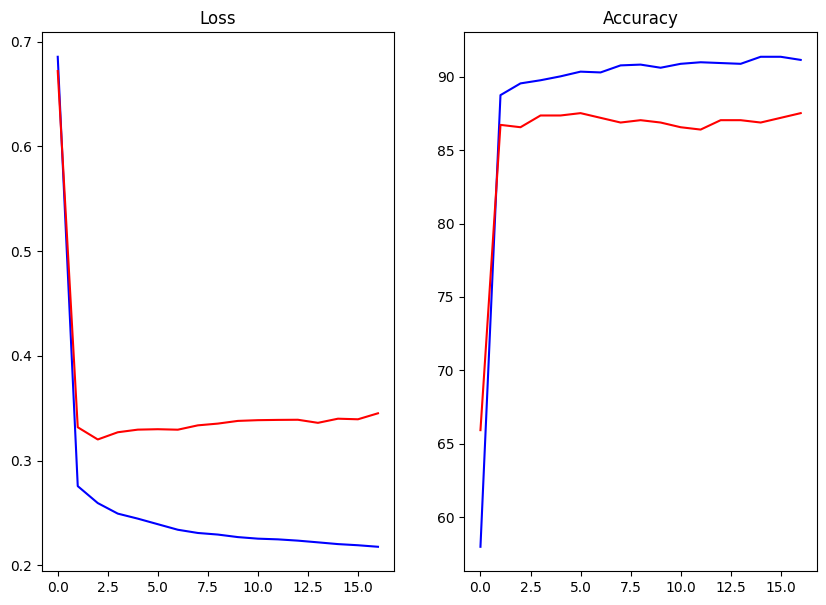

In [105]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Loss")
plt.plot(range(len(train_loss)),train_loss,c="b")
plt.plot(range(len(test_loss)),test_loss,c="r")
plt.subplot(1,2,2)
plt.title("Accuracy")
plt.plot(range(len(train_acc)),train_acc,c="b")
plt.plot(range(len(test_acc)),test_acc,c="r")

In [106]:
with torch.inference_mode():
  model.eval()
  logits = model(X_test_tensor)
  nn_pred = torch.round(torch.sigmoid(logits.squeeze()))

In [107]:
print(classification_report(Y_test_tensor,nn_pred))
print(confusion_matrix(Y_test_tensor,nn_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       316
         1.0       0.88      0.86      0.87       309

    accuracy                           0.88       625
   macro avg       0.88      0.88      0.88       625
weighted avg       0.88      0.88      0.88       625

[[281  35]
 [ 43 266]]


In [109]:
nn_pred = pd.DataFrame(nn_pred.numpy()).replace({0:"Çerçevelik",1:"Ürgüp Sivrisi"})

In [110]:
compare_classification_models(Y_test,
                              knn_pred,
                              svc_pred,
                              dtree_pred,
                              forest_pred,
                              nn_pred)

Classification Report:
Model 1:
               precision    recall  f1-score   support

   Çerçevelik       0.82      0.88      0.85       316
Ürgüp Sivrisi       0.87      0.81      0.84       309

     accuracy                           0.84       625
    macro avg       0.85      0.84      0.84       625
 weighted avg       0.84      0.84      0.84       625

[[278  38]
 [ 60 249]]

Model 2:
               precision    recall  f1-score   support

   Çerçevelik       0.84      0.92      0.88       316
Ürgüp Sivrisi       0.91      0.83      0.86       309

     accuracy                           0.87       625
    macro avg       0.88      0.87      0.87       625
 weighted avg       0.87      0.87      0.87       625

[[290  26]
 [ 54 255]]

Model 3:
               precision    recall  f1-score   support

   Çerçevelik       0.83      0.80      0.81       316
Ürgüp Sivrisi       0.80      0.83      0.82       309

     accuracy                           0.82       625
    macro avg 